Step 0: Importing dependencies and the dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# downloading the dataset
!wget https://archive.ics.uci.edu/static/public/186/wine+quality.zip
!unzip wine+quality.zip

--2024-03-21 14:48:46--  https://archive.ics.uci.edu/static/public/186/wine+quality.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘wine+quality.zip.2’

wine+quality.zip.2      [ <=>                ]  89.21K  --.-KB/s    in 0.03s   

2024-03-21 14:48:46 (2.94 MB/s) - ‘wine+quality.zip.2’ saved [91353]

Archive:  wine+quality.zip
replace winequality-red.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Step 1: Concatenating the gathered df's

In [ ]:
# reading csv's
red_df = pd.read_csv('winequality-red.csv', delimiter=';')
white_df = pd.read_csv('winequality-white.csv', delimiter=';')

# adding the new color column
red_df['wine_type'] = 'red'
white_df['wine_type'] = 'white'

# concatenating the df's
joined_df = pd.concat([red_df, white_df], ignore_index=True)

In [ ]:
# seeing dataset size
print("The number of red wine samples is:", red_df.shape[0])
print("while the white wine samples are:", white_df.shape[0])
print("Therefore, the total number of samples is:", joined_df.shape[0])

# and its features
print("\nNow the features on this DataFrame are:")
for feat, i in zip(joined_df.columns, range(joined_df.shape[1])):
  print(i, feat)

print("\nAt last, let's take a view of the DataFrame as it is:")
joined_df

The number of red wine samples is: 1599
while the white wine samples are: 4898
Therefore, the total number of samples is: 6497

Now the features on this DataFrame are:
0 fixed acidity
1 volatile acidity
2 citric acid
3 residual sugar
4 chlorides
5 free sulfur dioxide
6 total sulfur dioxide
7 density
8 pH
9 sulphates
10 alcohol
11 quality
12 wine_type

At last, let's take a view of the DataFrame as it is:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


Step 3: Doing a pre-analysis on the content of the DataFrame:

In [ ]:
# check for null data and data types

print(joined_df.info())

#check for NaN data

print(joined_df.isna().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None
fixed acidity           False
volatile acidity        Fals

As seen on the above tests, there is no missing data, as well as no 'NaN' values. Regarding the 13 columns, 1 of them is the categorical `wine_type` classification, 1 is the discreetly counted `quality`, and the other 11 are all the `float64` features gathered from each sample.

As for the balancing of the dataset, it was already seen before that there are more than thrice the number of white wine samples than red ones, so it's a somehow biased dataset.

Step 4: Analyzing the columns means and correlation to get the ones more related to the wine color

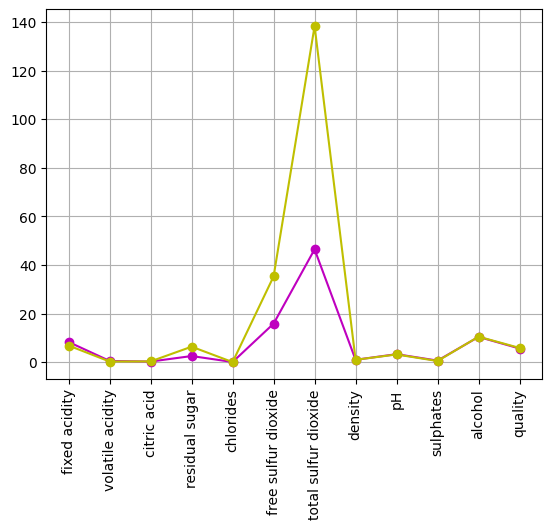

In [ ]:
# analyzing the feature means along each class
red_means = red_df.mean(numeric_only=True)
white_means = white_df.mean(numeric_only=True)

plt.plot(red_means, marker='o', color='m')
plt.plot(white_means, marker='o', color='y')
plt.xticks(range(12), joined_df.columns[0:12], rotation=90)

plt.grid()
plt.show()

As it is seem on the above plot, there are some variables with big differences between the wine types.
*   free sulfur dioxide
*   total sulfur dioxide
*   residual sugar

Let us calculate the correlations between the features itself:

In [ ]:
# one_hot_encoding the wine type column so it becomes a numerical value
encoded_df = pd.get_dummies(joined_df, columns=['wine_type']) # red = 1, white = 0

#calculating and displaying correlations for wine type
cor = encoded_df.corr()

print(cor.wine_type_red)

fixed acidity           0.486740
volatile acidity        0.653036
citric acid            -0.187397
residual sugar         -0.348821
chlorides               0.512678
free sulfur dioxide    -0.471644
total sulfur dioxide   -0.700357
density                 0.390645
pH                      0.329129
sulphates               0.487218
alcohol                -0.032970
quality                -0.119323
wine_type_red           1.000000
wine_type_white        -1.000000
Name: wine_type_red, dtype: float64


As the initial analysis shows, it looks like 'total sulfur dioxide' really has the highest of the correlations, while the other variables doesn't fit so well to the initial expectations. However, another variable with high correlation to the wine type is the 'volatile acidity'. Let us, then, plot the scatter analyzis to a better view of it:

Step 5: Plotting the scatter graph:

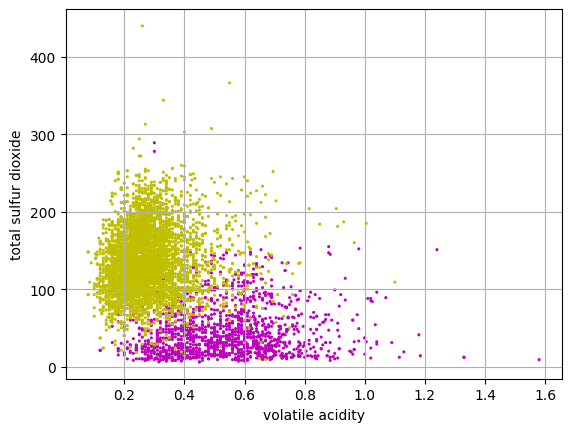

In [ ]:
plt.scatter(joined_df['volatile acidity'], joined_df['total sulfur dioxide'], c=['m' if i == 'red' else 'y' for i in joined_df['wine_type']], s=1.5)

plt.xlabel('volatile acidity')
plt.ylabel('total sulfur dioxide')

plt.grid()
plt.show()

Step 6: Analyzing quality of wines from other features.

Let us start by filtering the best and worst wines:

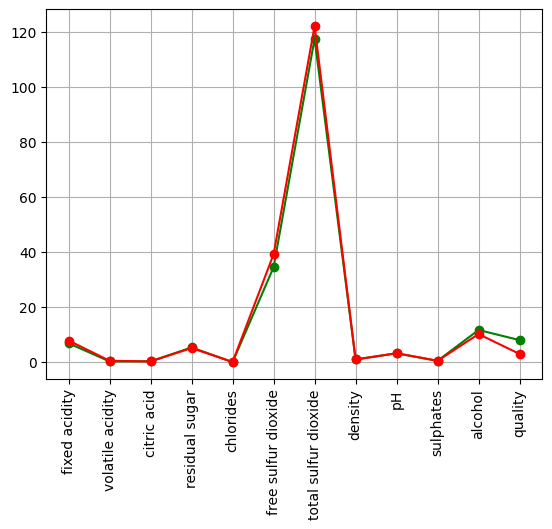

In [ ]:
best_wines_mask = joined_df['quality'] > 7
worst_wines_mask = joined_df['quality'] <= 3

best_means = joined_df[best_wines_mask].mean(numeric_only=True)
worst_means = joined_df[worst_wines_mask].mean(numeric_only=True)

plt.plot(best_means, marker='o', color='g')
plt.plot(worst_means, marker='o', color='r')

plt.xticks(range(12), joined_df.columns[0:12], rotation=90)

plt.grid()
plt.show()

Let us then, as before, do a correlation analysis:

In [ ]:
# as the correlations where already calculated, let's just display the ones related to quality:

print(cor.quality)

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
quality                 1.000000
wine_type_red          -0.119323
wine_type_white         0.119323
Name: quality, dtype: float64


In this case, the correlations are not that strong. Even though, alcohol and density has shown good levels of correlation. Let us plot the scatter to see if they are a good choice:

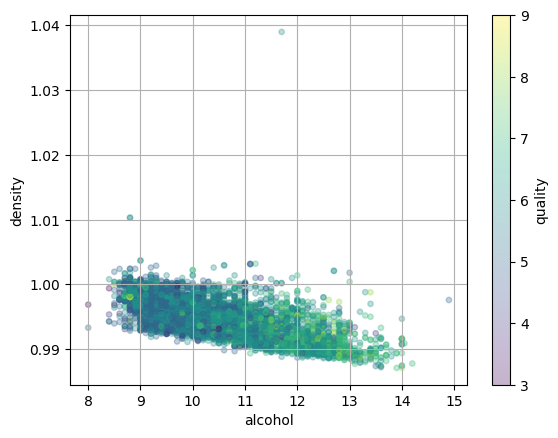

In [ ]:
plt.scatter(joined_df['alcohol'], joined_df['density'], c=joined_df['quality'], cmap='viridis', alpha=0.3, s=15)

plt.xlabel('alcohol')
plt.ylabel('density')

cbar = plt.colorbar()
cbar.set_label('quality')

plt.legend
plt.grid()
plt.show()

Analyzing this scatter plot we see that a good alcohol percentage and low density are characteristics of the good wines. It becomes very clear by seeing the gradient on the plot; As expected, there are some outliers, e.g.:high alcohol percentage with low quality, but the vast majority does somewhat fit on this conjecture.

At last, let us see the prevalence of red and white wines among the best and worst wines:

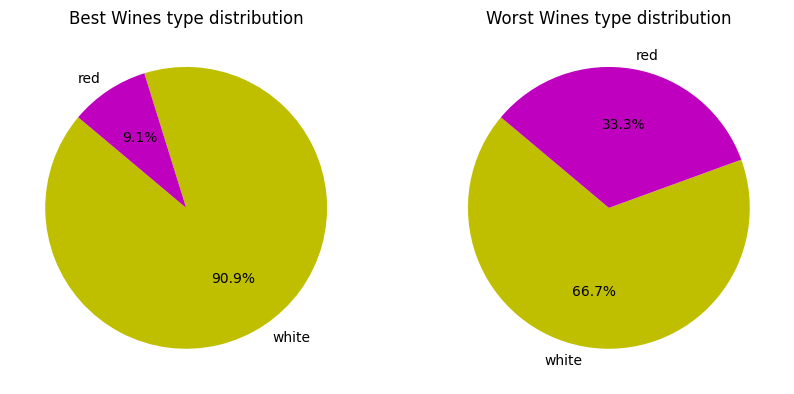

In [ ]:
count_best = joined_df[best_wines_mask]['wine_type'].value_counts()
count_worst = joined_df[worst_wines_mask]['wine_type'].value_counts()

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].pie(count_best, labels=count_best.index, colors=['y', 'm'], autopct='%1.1f%%', startangle=140)
ax[0].set_title('Best Wines type distribution')

ax[1].pie(count_worst, labels=count_worst.index, colors=['y', 'm'], autopct='%1.1f%%', startangle=140)
ax[1].set_title('Worst Wines type distribution')

plt.show()